Animation saved to dynamic_testing_demo.gif


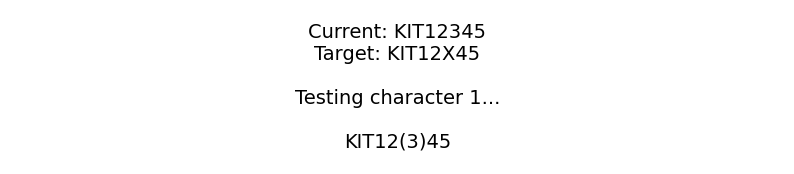

In [8]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the serial numbers
serial_1 = "KIT12345"
serial_2 = "KIT12X45"

# Function to generate dynamic testing steps
def generate_dynamic_steps(s1, s2):
    steps = []
    current = list(s1)
    
    for i in range(max(len(s1), len(s2))):
        # Test character by character
        if i < len(s2):
            if i >= len(current):
                current.append("_")  # Placeholder for missing character
            steps.append(('test', ''.join(current), i))  # Test step
            
            if i < len(current) and current[i] != s2[i]:
                current[i] = s2[i]  # Replace or insert
                steps.append(('replace', ''.join(current), i))
        
        # Handle deletions if s1 is longer
        if i >= len(s2) and i < len(current):
            steps.append(('delete', ''.join(current), i))
            current.pop()
    
    return steps

# Generate steps
steps = generate_dynamic_steps(serial_1, serial_2)

# Visualization
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis("off")

def update(frame):
    ax.clear()
    ax.axis("off")
    action, current, idx = steps[frame]
    target = serial_2

    # Visualize the string
    display = ""
    for i, char in enumerate(current):
        if i < len(target) and char == target[i]:
            display += char  # Matching characters
        elif i == idx:
            display += f"[{char}]"  # Highlight current character being tested
        else:
            display += f"({char})"  # Non-matching characters

    # Display information
    if action == 'test':
        title = f"Testing character {idx + 1}..."
    elif action == 'replace':
        title = f"Replacing character {idx + 1}!"
    elif action == 'delete':
        title = f"Deleting character {idx + 1}!"

    ax.text(0.5, 0.5, f"Current: {current}\nTarget: {target}\n\n{title}\n\n{display}",
            ha="center", va="center", fontsize=14, wrap=True)

ani = FuncAnimation(fig, update, frames=len(steps), interval=1000)

# Save as GIF
output_path = "dynamic_testing_demo.gif"
ani.save(output_path, writer="pillow")
print(f"Animation saved to {output_path}")


Animation saved to dynamic_testing_exciting_demo.gif


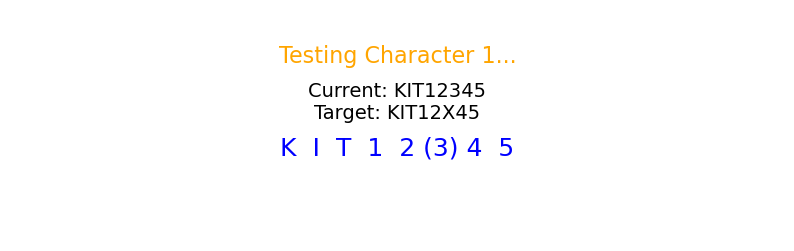

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Serial numbers to compare
serial_1 = "KIT12345"
serial_2 = "KIT12X45"

# Function to generate steps dynamically
def generate_dynamic_steps(s1, s2):
    steps = []
    current = list(s1)

    for i in range(max(len(s1), len(s2))):
        if i < len(s2):
            if i >= len(current):
                current.append("_")  # Placeholder for missing characters
            steps.append(('test', ''.join(current), i))  # Test step
            
            if i < len(current) and current[i] != s2[i]:
                current[i] = s2[i]  # Replace character
                steps.append(('replace', ''.join(current), i))
        
        if i >= len(s2) and i < len(current):
            steps.append(('delete', ''.join(current), i))
            current.pop()
    
    return steps

# Generate steps for transformation
steps = generate_dynamic_steps(serial_1, serial_2)

# Set up visualization
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis("off")

def update(frame):
    ax.clear()
    ax.axis("off")
    action, current, idx = steps[frame]
    target = serial_2

    # Visualize the strings
    display = ""
    for i in range(max(len(current), len(target))):
        if i < len(target) and i < len(current):
            if current[i] == target[i]:
                display += f" {current[i]} "  # Green for matches
            elif i == idx:
                display += f"[{current[i]}]"  # Blue for current test
            else:
                display += f"({current[i]})"  # Red for mismatches
        elif i < len(current):
            display += f"({current[i]})"  # Red for extra characters
        elif i < len(target):
            display += f"[_{target[i]}]"  # Blue for missing characters

    # Add a dynamic title for context
    if action == 'test':
        title = f"Testing Character {idx + 1}..."
    elif action == 'replace':
        title = f"Mismatch Detected! Replacing Character {idx + 1}..."
    elif action == 'delete':
        title = f"Extra Character Found! Deleting Character {idx + 1}..."

    # Display the text
    ax.text(0.5, 0.6, f"Current: {current}\nTarget: {target}", 
            ha="center", va="center", fontsize=14, wrap=True)
    ax.text(0.5, 0.4, display, ha="center", va="center", fontsize=18, wrap=True, color="blue")
    ax.text(0.5, 0.8, title, ha="center", va="center", fontsize=16, color="orange")

ani = FuncAnimation(fig, update, frames=len(steps), interval=1000)

# Save as GIF
output_path = "dynamic_testing_exciting_demo.gif"
ani.save(output_path, writer="pillow")
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

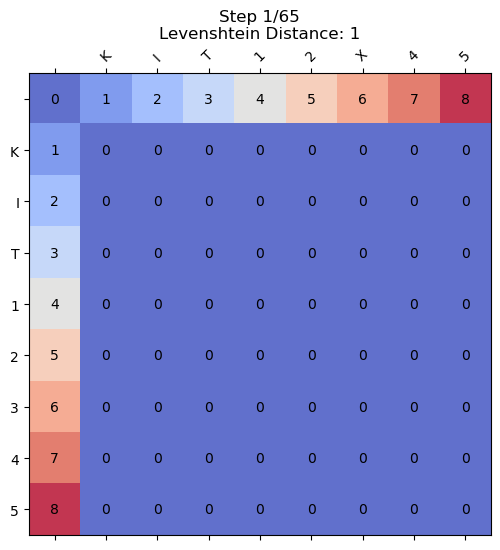

In [2]:
# Let's create an animated demonstration of the Levenshtein algorithm using Python's Matplotlib and animation libraries.

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Define two example serial numbers with minor typos
serial_1 = "KIT12345"
serial_2 = "KIT12X45"

# Define a function to compute Levenshtein distance with step visualization
def levenshtein_steps(s1, s2):
    n, m = len(s1), len(s2)
    dp = np.zeros((n + 1, m + 1), dtype=int)
    steps = []

    # Initialize the dp table
    for i in range(n + 1):
        dp[i][0] = i
    for j in range(m + 1):
        dp[0][j] = j
    
    steps.append(dp.copy())  # Capture the initial state

    # Compute distances and capture steps
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
            steps.append(dp.copy())
    
    return dp[n][m], steps

# Compute Levenshtein distance and capture steps
distance, steps = levenshtein_steps(serial_1, serial_2)

# Create an animated visualization
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.clear()
    dp = steps[frame]
    ax.matshow(dp, cmap="coolwarm", alpha=0.8)
    for i in range(dp.shape[0]):
        for j in range(dp.shape[1]):
            ax.text(j, i, str(dp[i, j]), va='center', ha='center')
    ax.set_xticks(np.arange(len(serial_2) + 1))
    ax.set_yticks(np.arange(len(serial_1) + 1))
    ax.set_xticklabels([''] + list(serial_2), rotation=45)
    ax.set_yticklabels([''] + list(serial_1))
    ax.set_title(f"Step {frame + 1}/{len(steps)}\nLevenshtein Distance: {distance}")

ani = FuncAnimation(fig, update, frames=len(steps), interval=500)

# Save the animation as a video or GIF
animation_path = "./levenshtein_demo.mp4"
ani.save(animation_path, writer="ffmpeg")

animation_path
